In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as consts
from scipy.stats import maxwell

## Inverse CDF method

#### Real Maxwell-boltzmann

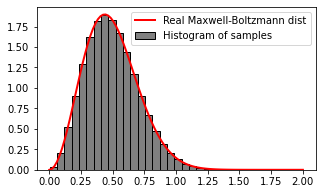

In [232]:
Mass = 86.909184   # In AMU
Temp = 0.001       # In kelvin

scale_factor =  np.sqrt(consts.k*Temp/(Mass*consts.u))  # sqrt(kT/m)

fig, ax = plt.subplots(1,1,figsize=(5,3))

xs1 = np.linspace(0,2,100)
ys1 = maxwell.pdf(xs1,scale=scale_factor)

xs2 = np.random.uniform(low=0,high=1,size=1000000)
ys2 = maxwell.ppf(xs2,scale=scale_factor)  ## ppf is inverse cdf in scipy 

ax.plot(xs1,ys1,lw=2,color="red",label="Real Maxwell-Boltzmann dist")
ax.hist(ys2,bins=2*int(1+np.ceil(np.log(len(ys2)))),color='grey',density=True,edgecolor="black",label="Histogram of samples")

ax.legend()
plt.show()

## Acceptance-Rejection sampling

real pdf: $f(x) = \sqrt{\frac{2}{\pi}}\frac{1}{a^3}\,x^2\textrm{exp}(\frac{-x^2}{2a^2})$ <br>
"similar" pdf: $g(x)=\sqrt{\frac{2}{\pi}}\frac{1}{a^3}\,x\,\textrm{exp}(\frac{-x^2}{2a^2})$

in this case, the $cdf$ for $g(x)$ is: $\int_{0}^x\sqrt{\frac{2}{\pi}}\frac{1}{a^3}\,x\,\textrm{exp}(\frac{-x^2}{2a^2})\,dx=\sqrt{\frac{2}{\pi}}\frac{1}{a}\big(1-\textrm{exp}(\frac{-x^2}{2a^2})\big)$ <br>
and corresponding inverse cdf found by solving for $x$:
$cdf^{-1}(u) = a\sqrt{\frac{-2}{a\sqrt{2\pi}u-2}},\quad\textrm{for}\,\,u-\sqrt{\frac{2}{\pi}}\frac{1}{a}<0\,\,\textrm{and}\,\, a>0$

choosing $M<\infty$, s.t. $f(x)\leq M g(x), \forall x$, which here reduces to chosing $M$, s.t. $x^2\leq Mx$. Say that upper bound of $x$ is $x=c$, then $M=c$ satisfies this.

Algorithm could then be: <br>
&ensp; for $x$ in... <br>
&ensp; - Generate a sample $x$ from dist. with pdf = $g(x)$<br>
&ensp; - Generate sample $u$ from [0,1)$*M$-uniform random dist<br>
&emsp; if $u>\frac{f(x)}{Mg(x)}$: reject sample $x$<br>
&emsp; else: accept $x$ as sample from dist. with pdf = $f(x)$. <br> <br>

here we chose $M=\sqrt{\frac{2}{\pi}}\frac{1}{a}$ to avoid invalid sqrt of inverse cdf evalution
    

In [197]:
a = scale_factor ## sqrt(kT/m)

def f(x):
    return 1./(a**3)*np.sqrt(2/np.pi)*x**2*np.exp(-x**2/(2*a**2))

def g(x):
    return 1./(a**3)*np.sqrt(2/np.pi)*x*np.exp(-x**2/(2*a**2)) 

def inv_cdf(u):
    return a*np.sqrt(2*np.log(-2/(a*np.sqrt(2*np.pi)*u-2)))

In [223]:
M = 0.99999*np.sqrt(2)/(a*np.sqrt(np.pi))
us = np.random.uniform(low=0,high=1,size=1000000)*M
xs = inv_cdf(us)

us = np.random.permutation(us) # Has to be shuffled for random picking in loop

## Sampling
samples = []
for i in range(len(xs)):
    if us[i] <= f(xs[i])/(M*g(xs[i])):
        samples.append(xs[i])
print("sample size:",len(samples))

sample size: 58025


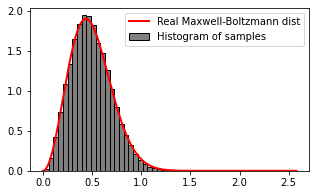

In [230]:
fig, ax = plt.subplots(1,1,figsize=(5,3))

new_xs = np.linspace(0,M,1000)
ax.plot(new_xs,maxwell.pdf(new_xs,scale=a),color="red",lw=2,label="Real Maxwell-Boltzmann dist")
ax.hist(samples, bins=2*int(1+np.ceil(np.log(len(samples)))), density=True,color="grey",edgecolor="black",label="Histogram of samples")
ax.legend()
plt.show()

### Simple monte carlo sampling

Initialize $N$ sized list of $\textrm{uniform}(y_{min},y_{max})$. <br> <br>
for each $x$ in $[x_{min},x_{max}]$ <br>
&emsp; for each sample in list($\textrm{uniform}(y_{min},y_{max}))$: <br>
&emsp; &emsp; if sample < y(x): <br>
&emsp; &emsp;&emsp; append sample to samples.

In [226]:
## Creating interval
xs           = np.linspace(0,2,1000)
ys           = maxwell.pdf(xs,scale=scale_factor)
y_sample_range = np.random.uniform(low=np.min(ys),high=np.max(ys),size=len(xs))

samples = []
for x_idx, x in enumerate(xs):
    for y_sample in y_sample_range:
        if y_sample <= ys[x_idx]:
            samples.append(x)
print("sample size:",len(samples))

sample size: 257228


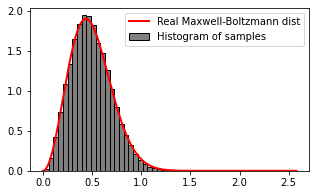

In [229]:
fig, ax = plt.subplots(1,1,figsize=(5,3))

new_xs = np.linspace(0,M,1000)
ax.plot(new_xs,maxwell.pdf(new_xs,scale=a),color="red",lw=2,label="Real Maxwell-Boltzmann dist")
ax.hist(samples, bins=2*int(1+np.ceil(np.log(len(samples)))), density=True,color="grey",edgecolor="black",label="Histogram of samples")
ax.legend()
plt.show()